In [28]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import unicodedata
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suporte928\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suporte928\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df_abrangencia = pd.read_csv('./abrangencia_unidades_cfps.csv')
df_vagas = pd.read_csv('./busca de Vagas.csv')
df_produtos = pd.read_csv('./produtos.csv')

In [4]:
df_vagas.loc[df_vagas['LOCAL'] == 'Pedreira - SP'] = 'Pedreira, SP' 

C:\Users\suporte928\AppData\Local\Temp\ipykernel_7984\4121843623.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pedreira, SP' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_vagas.loc[df_vagas['LOCAL'] == 'Pedreira - SP'] = 'Pedreira, SP'
C:\Users\suporte928\AppData\Local\Temp\ipykernel_7984\4121843623.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pedreira, SP' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_vagas.loc[df_vagas['LOCAL'] == 'Pedreira - SP'] = 'Pedreira, SP'
C:\Users\suporte928\AppData\Local\Temp\ipykernel_7984\4121843623.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pedreira, SP' has dtype incompatible with float64, ple

In [5]:
carac_especiais = ['\n', '?', '@', '!', ',', ';', '!', 'R$', '$', ':', '*', '#']
desc_limpa = []
for vaga in df_vagas.loc[df_vagas['LOCAL'] == 'Pedreira, SP']['DESCRICAO']:
    
    for carac in carac_especiais:
        vaga = vaga.replace(carac, '')
    desc_limpa.append(vaga.lower())


In [6]:
tokenizer = RegexpTokenizer(r'\w+')
all_tokens = []

def remover_acentos(texto):
    return unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')

for desc in desc_limpa:
    texto_limpo = remover_acentos(desc.lower())
    tokens = tokenizer.tokenize(texto_limpo)

    stop_words = set(stopwords.words('portuguese'))
    tokens_filtrados = [t for t in tokens if t not in stop_words and t not in string.punctuation]

    all_tokens += tokens_filtrados

In [7]:
contagem = Counter(all_tokens)
contagem.most_common(100)


[('pedreira', 152),
 ('experiencia', 138),
 ('empresa', 115),
 ('produtos', 103),
 ('clientes', 99),
 ('qualidade', 91),
 ('descricao', 83),
 ('sp', 81),
 ('trabalho', 79),
 ('ensino', 72),
 ('cliente', 69),
 ('vendas', 68),
 ('area', 67),
 ('requisitos', 66),
 ('conhecimento', 66),
 ('local', 65),
 ('completo', 63),
 ('vaga', 61),
 ('equipe', 60),
 ('medio', 58),
 ('atendimento', 57),
 ('profissional', 57),
 ('realizar', 57),
 ('voce', 56),
 ('trabalhar', 55),
 ('controle', 55),
 ('tipo', 53),
 ('ter', 52),
 ('atividades', 51),
 ('beneficios', 50),
 ('residir', 48),
 ('cidade', 45),
 ('efetivo', 45),
 ('atribuicoes', 44),
 ('horario', 43),
 ('vale', 42),
 ('organizacao', 42),
 ('segunda', 41),
 ('producao', 41),
 ('disponibilidade', 40),
 ('manutencao', 40),
 ('fazer', 39),
 ('vinculo', 37),
 ('processos', 37),
 ('salario', 36),
 ('regiao', 36),
 ('sexta', 35),
 ('venda', 35),
 ('ferramentas', 35),
 ('1', 34),
 ('busca', 34),
 ('funcao', 34),
 ('transporte', 33),
 ('plano', 33),
 ('co

In [8]:
bigrams = []

for desc in desc_limpa:
    texto_limpo = remover_acentos(desc.lower())
    tokens = tokenizer.tokenize(texto_limpo)
    stop_words = set(stopwords.words('portuguese'))
    tokens_filtrados = [t for t in tokens if t not in stop_words and t not in string.punctuation]

    bigrams += list(ngrams(tokens_filtrados, 2))

contagem_bigrams = Counter(bigrams)

for bigrama, freq in contagem_bigrams.most_common(30):
    print(f"{' '.join(bigrama)}: {freq}")

pedreira sp: 66
ensino medio: 50
medio completo: 43
tipo vinculo: 35
cidade pedreira: 33
vinculo efetivo: 32
localizada cidade: 30
empresa localizada: 29
sp ramo: 29
residir pedreira: 27
segunda sexta: 23
assistencia medica: 22
refeicao local: 21
seguro vida: 19
conhecimento basico: 19
atendimento cliente: 18
vale transporte: 18
cidades proximas: 18
experiencia comprovada: 17
vale alimentacao: 17
pedreira cidades: 17
local assistencia: 16
completo experiencia: 16
alem disso: 16
m b: 16
b ltda: 16
trabalhar equipe: 15
plasticos m: 15
pre preparo: 14
fazer parte: 14


In [9]:
def extrair_conhecimento_especifico(texto):
    texto = remover_acentos(texto.lower())

    padroes = [
        r"conhecimento basico em ([\w\s]+)",
        r"conhecimento basico de ([\w\s]+)",
        r"conhecimentos basicos em ([\w\s]+)",
        r"conhecimentos basicos de ([\w\s]+)"
    ]
    
    encontrados = []
    for padrao in padroes:
        resultados = re.findall(padrao, texto)
        encontrados.extend([r.strip() for r in resultados])

    return encontrados

conhecimentos_encontrados = []
for desc in df_vagas["DESCRICAO"].dropna():
    conhecimentos_encontrados.extend(extrair_conhecimento_especifico(desc))

contagem_conhecimentos = Counter(conhecimentos_encontrados)
contagem_conhecimentos.most_common(15)


[('excel', 7),
 ('pacote office', 3),
 ('sistemas erp ou ferramentas de gestao de ativos', 2),
 ('hardware', 2),
 ('excel e habilidades especificas em ferramentas lean manutacturing e ferramentas da qualidade',
  1),
 ('excel\n experiencia especifica com ferramentas lean manufaturing e ferramentas da qualidade',
  1),
 ('mecanica', 1),
 ('tryout e manutencao de moldes', 1),
 ('informatica e boa comunicacao', 1),
 ('excel\n experiencia especifica com ferramentas lean manufaturing e ferramentas da qualidade\n\nbeneficios',
  1)]

In [13]:
vocabulario_combinado = [
    "conhecimento basico em excel",
    "conhecimento basico em pacote office",
    "conhecimento basico em erp",
    "conhecimento basico em mecanica",
    "conhecimento basico em ferramentas lean",
    "conhecimento basico em informatica",
    "conhecimento basico em hardware"
]

def extrair_competencias_vaga(texto):
    texto_limpo = remover_acentos(texto.lower())

    competencias = []

    if "excel" in texto_limpo:
        competencias.append("excel")
    if "pacote office" in texto_limpo:
        competencias.append("pacote office")
    if "erp" in texto_limpo or "sistemas erp" in texto_limpo:
        competencias.append("erp")
    if "hardware" in texto_limpo:
        competencias.append("hardware")
    if "mecanica" in texto_limpo:
        competencias.append("mecanica")
    if "ferramentas lean" in texto_limpo or "lean manufacturing" in texto_limpo:
        competencias.append("ferramentas lean")
    if "informatica" in texto_limpo:
        competencias.append("informatica")

    return competencias



In [14]:
df_vagas["COMPETENCIAS_EXTRAIDAS"] = df_vagas["DESCRICAO"].fillna("").apply(extrair_competencias_vaga)
df_resultado = df_vagas[["ID_VAGA", "TITULO", "COMPETENCIAS_EXTRAIDAS"]]

In [29]:
df_resultado[df_resultado["COMPETENCIAS_EXTRAIDAS"].str.len() > 0]


,ID_VAGA,TITULO,COMPETENCIAS_EXTRAIDAS
4,eyJqb2JfdGl0bGUiOiJQZWRyZWlybyIsImNvbXBhbnlfbm...,Pedreiro,[erp]
24,eyJqb2JfdGl0bGUiOiJGZXJyYW1lbnRlaXJvIiwiY29tcG...,Ferramenteiro,[erp]
29,eyJqb2JfdGl0bGUiOiJBbmFsaXN0YSBkZSBtYXRlcmlhaX...,Analista de materiais,"[excel, mecanica]"
33,eyJqb2JfdGl0bGUiOiJQZWRyZWlybyIsImNvbXBhbnlfbm...,Pedreiro,[erp]
38,eyJqb2JfdGl0bGUiOiJDT05TVUxUT1IoQSkgREUgVkVORE...,CONSULTOR(A) DE VENDAS - CVC PEDREIRA,[excel]
53,eyJqb2JfdGl0bGUiOiJDb25zdWx0b3IoYSkgZGUgdmVuZG...,Consultor(a) de vendas - cvc pedreira (1),[excel]
56,eyJqb2JfdGl0bGUiOiJFbmdlbmhlaXJvIGRlIFByb2R1w6...,Engenheiro de Produção,"[excel, informatica]"
57,eyJqb2JfdGl0bGUiOiJBbmFsaXN0YSBkZSBtYXRlcmlhaX...,Analista de materiais,"[excel, mecanica]"
60,eyJqb2JfdGl0bGUiOiJUw4lDTklDTyBERSBMQUJPUkFUw5...,TÉCNICO DE LABORATÓRIO,"[excel, pacote office]"
61,eyJqb2JfdGl0bGUiOiJBbmFsaXN0YSBkZSBNYXJrZXRpbm...,Analista de Marketing,[pacote office]


In [27]:
todas_competencias = df_resultado["COMPETENCIAS_EXTRAIDAS"].sum()
contagem = Counter(todas_competencias)

print(contagem.most_common(10))

[('excel', 33), ('erp', 14), ('pacote office', 14), ('ferramentas lean', 10), ('informatica', 8), ('mecanica', 7), ('hardware', 2)]


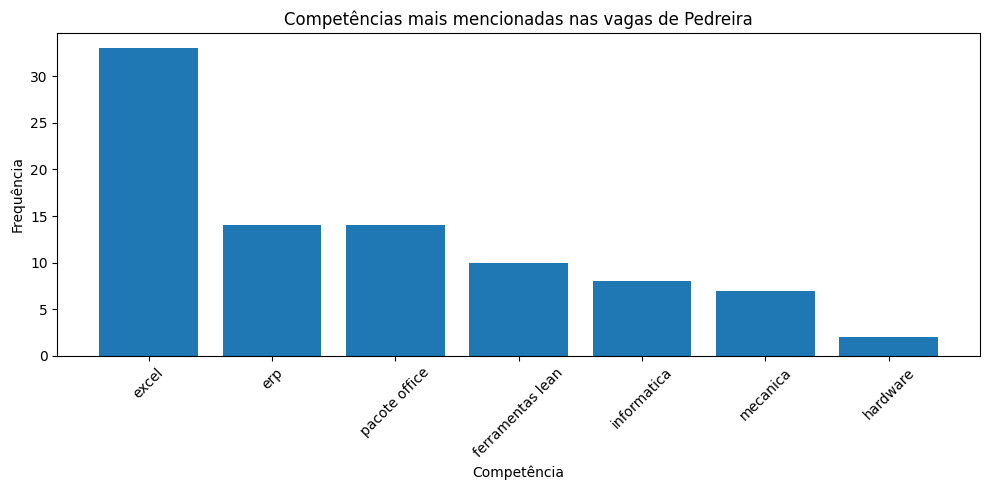

In [30]:
labels, values = zip(*contagem.most_common(10))

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title("Competências mais mencionadas nas vagas de Pedreira")
plt.xlabel("Competência")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cruzamento de Dados com o Catalogo SENAI
---

In [31]:
competencias_desejadas = ["excel", "erp", "informatica", "pacote office", "mecanica", "ferramentas lean"]
def curso_relacionado(competencia, df):
    return df[
        df["NOME_PRODUTO"].str.lower().str.contains(competencia) |
        df["AREA"].fillna("").str.lower().str.contains(competencia) |
        df["SEGMENTO"].fillna("").str.lower().str.contains(competencia)
    ]

relacionamentos = {}

for comp in competencias_desejadas:
    cursos = curso_relacionado(comp, df_produtos)
    relacionamentos[comp] = cursos[["CODIGO_PRODUTO", "NOME_PRODUTO", "AREA", "SEGMENTO"]].drop_duplicates()


In [32]:
relacionamentos["excel"]


,CODIGO_PRODUTO,NOME_PRODUTO,AREA,SEGMENTO
309,2039,MS - EXCEL,Tecnologia da Informação,Informática
336,2236,Microsoft Excel,Tecnologia da Informação,Informática
400,2917,Iniciação à Informática - Windows-Word-Excel,Tecnologia da Informação,Informática
427,3457,MS-EXCEL,Tecnologia da Informação,Informática
666,5204,Iniciação em Informática - Excel,Tecnologia da Informação,Informática
...,...,...,...,...
38345,105709,APLICAÇÕES PRÁTICAS - EXCEL,DESENVOLVIMENTO DE SISTEMAS,Tecnologia da Informação - Software
38581,106040,EXCEL AVANÇADO,DESENVOLVIMENTO DE SISTEMAS,Tecnologia da Informação - Software
38639,106125,Excel Básico,DESENVOLVIMENTO DE SISTEMAS,Tecnologia da Informação - Software
38655,106149,Excelência no Atendimento ao Cliente,Gestão,Marketing
